# NNLab2
  1. Neural Network with Python
  2. The MNIST Dataset of Handwritten Numbers

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Neural Network with Python

### 1) 클래스 정의
먼저, **scipy.special의 expit(sigmoid 함수)**로 활성화 함수를 만들어줍니다.  
이는 넘파이 행렬에도 사용할 수 있습니다.

In [2]:
import numpy as np
from scipy.special import expit
activ_fct = lambda x: expit(x)

In [3]:
# scipy의 시그모이드 함수가 넘파이 행렬 각 원소에 적용되는지 확인
A = np.array([1, 2, 3], ndmin=2).T
activ_fct(A)

array([[0.73105858],
       [0.88079708],
       [0.95257413]])

In [4]:
# 신경망 클래스 정의
class neuralNetwork:

    # 신경망 초기화
    def __init__(self, inodes, hnodes, onodes, lr):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        # NNlab1에서는 333, 222를 다뤘지만 각 계층의 노드 수가 다를 수도 있음
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes

        # 가중치 행렬, 행렬은 대문자로 표기
        # 배열 내 가중치는 w_ij로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨
        self.W_ih = np.random.normal(0.0, pow(self.hnodes), (self.hnodes, self.inodes))
        self.W_ho = np.random.normal(0.0, pow(self.onodes), (self.onodes, self.hnodes))

        # 학습률
        self.lr = lr

        # 활성화 함수로는 시그모이드 함수를 이용
        self.activ_fct = lambda x: expit(x)
        pass

    # 신경망 학습시키기
    def train(self, input_list, target_list):
        # 리스트(1 x n) -> 넘파이 행렬(n x 1)
        I_i = np.array(input_list, ndmin=2).T
        T_o = np.array(target_list, ndmin=2).T

        # 은닉 계층으로 들어오는 신호
        I_h = np.dot(self.W_ih, I_i)
        # 은닉 계층에서 나가는 신호
        O_h = self.activ_fct(I_h)

        # 출력 계층으로 들어오는 신호
        I_o = np.dot(self.W_ho, I_h)
        # 출력 계층에서 나가는 신호
        O_o = self.activ_fct(I_o)

        # 출력 계층의 오차는 (실제 값 - 계산 값)
        E_o = T_o - O_o
        # 은닉 계층의 오차는
        E_h = np.dot(self.W_ho.T, E_o)

        # 은닉 계층과 출력 계층 간의 가중치 업데이트 (W = W - lr * dE/dW, dE/dW = - (t - o) * ...)
        self.W_ho += self.lr * np.dot((E_o * O_o * (1.0 - O_o)), O_h.T)

        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.W_ih += self.lr * np.dot((E_h * O_h * (1 - O_h)), I_i.T)
        pass

    # 신경망에 질의하기
    def query(self, input_list):
        # 리스트(1 x n) -> 넘파이 행렬(n x 1)
        I_i = np.array(input_list, ndmin=2).T

        # 은닉 계층으로 들어오는 신호
        I_h = np.dot(self.W_ih, I_i)
        # 은닉 계층에서 나가는 신호
        O_h = self.activ_fct(I_h)

        # 출력 계층으로 들어오는 신호
        I_o = np.dot(self.W_ho, I_h)
        # 출력 계층에서 나가는 신호
        O_o = self.activ_fct(I_o)

        return O_o

### 2) NNlab1의 예제로 신경망 클래스 테스트
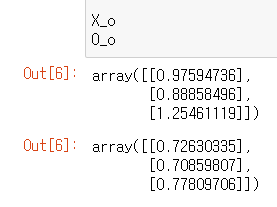
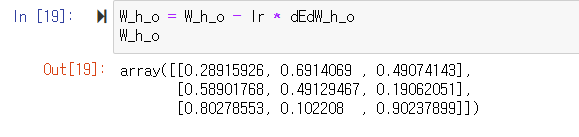
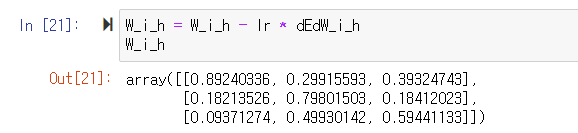

In [5]:
import numpy as np
from scipy.special import expit
activ_fct = lambda x: expit(x)

# 신경망 클래스 정의
class neuralNetwork:

    # 신경망 초기화
    def __init__(self, inodes, hnodes, onodes, lr):
        # 입력, 은닉, 출력 계층의 노드 개수 설정
        # NNlab1에서는 333, 222를 다뤘지만 각 계층의 노드 수가 다를 수도 있음
        self.inodes = inodes
        self.hnodes = hnodes
        self.onodes = onodes

        # 가중치 행렬, 행렬은 대문자로 표기
        # 배열 내 가중치는 w_ij로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨
        self.W_ih = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.W_ho = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))

        # 학습률
        self.lr = lr

        # 활성화 함수로는 시그모이드 함수를 이용
        self.activ_fct = lambda x: expit(x)
        pass

    # 신경망 학습시키기
    def train(self, input_list, target_list):
        # 리스트(1 x n) -> 넘파이 행렬(n x 1)
        I_i = np.array(input_list, ndmin=2).T
        T_o = np.array(target_list, ndmin=2).T

        # 은닉 계층으로 들어오는 신호
        I_h = np.dot(self.W_ih, I_i) # (주의)입력 계층에서는 I를 사용
        # 은닉 계층에서 나가는 신호
        O_h = self.activ_fct(I_h)

        # 출력 계층으로 들어오는 신호
        I_o = np.dot(self.W_ho, O_h) # 그 외 계층에서는 O를 사용
        # 출력 계층에서 나가는 신호
        O_o = self.activ_fct(I_o)

        # 출력 계층의 오차는 (실제 값 - 계산 값)
        E_o = T_o - O_o
        # 은닉 계층의 오차는
        E_h = np.dot(self.W_ho.T, E_o)

        # 은닉 계층과 출력 계층 간의 가중치 업데이트 (W = W - lr * dE/dW, dE/dW = - (t - o) * ...)
        self.W_ho += self.lr * np.dot(E_o * O_o * (1.0 - O_o), O_h.T)

        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.W_ih += self.lr * np.dot(E_h * O_h * (1 - O_h), I_i.T)
        pass

    # 신경망에 질의하기
    def query(self, input_list):
        # 리스트(1 x n) -> 넘파이 행렬(n x 1)
        I_i = np.array(input_list, ndmin=2).T

        # 은닉 계층으로 들어오는 신호
        I_h = np.dot(self.W_ih, I_i)
        # 은닉 계층에서 나가는 신호
        O_h = self.activ_fct(I_h)

        # 출력 계층으로 들어오는 신호
        I_o = np.dot(self.W_ho, O_h)
        # 출력 계층에서 나가는 신호
        O_o = self.activ_fct(I_o)

        return O_o

input_list = [0.9, 0.1, 0.8]
target_list = [0.01, 0.01, 0.99]

nn = neuralNetwork(3, 3, 3, 0.1)

# 가중치 행렬 임의의 값으로 변경
nn.W_ih = np.array([[0.9, 0.3, 0.4],
                  [0.2, 0.8, 0.2],
                  [0.1, 0.5, 0.6]])
nn.W_ho = np.array([[0.3, 0.7, 0.5],
                  [0.6, 0.5, 0.2],
                  [0.8, 0.1, 0.9]])

print(nn.query(input_list)) # 정상 출력

nn.train(input_list, target_list)
print(nn.W_ho) # 정상 출력
print(nn.W_ih) # 정상 출력

[[0.72630335]
 [0.70859807]
 [0.77809706]]
[[0.28915926 0.6914069  0.49074143]
 [0.58901768 0.49129467 0.19062051]
 [0.80278553 0.102208   0.90237899]]
[[0.89240336 0.29915593 0.39324743]
 [0.18213526 0.79801503 0.18412023]
 [0.09371274 0.49930142 0.59441133]]


## 2. The MNIST Dataset of Handwritten Numbers

### MNIST Data Set
  * training data 60000
  * test data 10000

### 1) File Access

**시간 절약을 위해 100개 레코드를 가지는 작은 데이터 세트를 사용합니다.**  
readlines()는 파일의 모든 행을 읽어 메모리에 올리므로 큰 데이터에서는 사용하지 않지만,  
지금은 작은 데이터를 다룰 것이기 때문에 readlines()를 사용합니다.

In [6]:
data_file = open("../mnist_dataset/mnist_train_100.csv", "r")
data_list = data_file.readlines()
data_file.close()

In [7]:
len(data_list)

100

In [8]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### 2) Visualize MNIST Data

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# 브라우저에서 바로 그림을 볼 수 있게
%matplotlib inline

### data_list의 각 행마다 숫자 데이터가 있습니다.
  * 각 행의 index 0에는 label이 적혀있습니다.
  * 각 행의 index [1:]에는 0~255의 숫자로 색이 적혀있습니다.
  * all_value에 행을 넣어 all_values[1:0]을 matplot 라이브러리로 가시화합니다.
  * reshape이용해 784개의 숫자를 28x28의 정방행렬로 만듭니다.

5


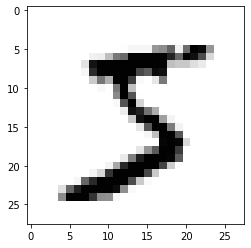

In [10]:
all_values = data_list[0].split(',')
print(all_values[0]) # label

image_array = np.asfarray(all_values[1:]).reshape((28, 28)) # asfarray : as float array
plt.imshow(image_array, cmap="Greys", interpolation="None")

0


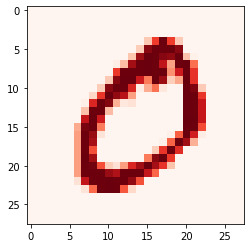

In [11]:
all_values = data_list[1].split(',')
print(all_values[0])

image_array = np.asfarray(all_values[1:]).reshape((28, 28))
plt.imshow(image_array, cmap="Reds", interpolation="None")

### 3) Preparing the MNIST Training Data

신경망의 학습과 질의에 사용하기 위해, 활성화 함수의 수용 범위 내에 있도록 데이터를 변경합니다.

**입력값은 0.01 이상 1.0 이하**
  * 입력값이 0이 되면 가중치 업데이트를 없애버리므로 하한선은 0.01로 합니다.
  * 입력값이 1인 것은 문제가 되지 않기 때문에 상한선은 1로 합니다.
  * cf) 출력값에서는 1을 피해야합니다.

In [12]:
scaled_input = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
# (scaled_input - 0.01) / 0.99 * 255.0 # 역으로 하면
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [13]:
# 출력 노드는 10
onodes = 10

# 크기 10의 행렬의 각 원소를 0.01로 초기화
targets = np.zeros(onodes) + 0.01
targets

# 그 중 정답인 index를 찾아 0.99로 변경
targets[int(all_values[0])] = 0.99
targets

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

array([0.99, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

## 4) 신경망 테스트

### 4-1) train 100 test 10

### 학습 데이터로 신경망을 학습시킵니다.
우선 100개의 레코드로 해봅니다.

In [14]:
# 입력, 은닉, 출력 노드의 수
inodes = 784
hnodes = 100
onodes = 10

# 학습률은 0.3
lr = 0.3

# 신경망의 인스턴스 생성
n = neuralNetwork(inodes, hnodes, onodes, lr)

In [15]:
# mnist 학습 데이터 불러오기
train_data_file = open("../mnist_dataset/mnist_train_100.csv", "r")
train_data_list = train_data_file.readlines()
train_data_file.close()

len(train_data_list)

100

In [16]:
# 신경망 학습시키기

# 학습 데이터의 레코드를 순서대로 방문
for record in train_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
    targets = np.zeros(onodes) + 0.1
    targets[int(all_values[0])] = 0.99

    # 학습
    n.train(inputs, targets)
    pass

### 신경망이 어떻게 동작하는지 확인합니다.
  * 비록 100개의 적은 레코드지만 신경망 학습이 어떻게 됐는지 확인합니다.
  * 10개의 테스트 데이터 중 첫 번째 레코드에 대해 먼저 확인합니다.
  * 그 다음 나머지 레코드에 대해서도 확인합니다.

In [17]:
# mnist 테스트 데이터 불러오기
test_data_file = open("../mnist_dataset/mnist_test_10.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

len(test_data_list)

10

**첫 번째 레코드에 대해 확인**

In [18]:
# 첫번째 테스트 레코드 불러오기
all_values = test_data_list[0].split(',')
# 레이블
all_values[0]

'7'

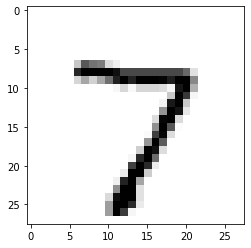

In [19]:
image_array = np.asfarray(all_values[1:]).reshape(28, 28)
plt.imshow(image_array, cmap="Greys", interpolation="None")

레코드의 label은 7이다.  
query결과에서 index 7의 숫자가 1에 가까운 높은 숫자인지 확인한다.

In [20]:
n.query(np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01)
# index 7의 값이 높게 나온다.

array([[0.12338561],
       [0.04869411],
       [0.07200291],
       [0.07000435],
       [0.13405593],
       [0.09857301],
       [0.04237397],
       [0.899125  ],
       [0.06198613],
       [0.04268468]])

**나머지 레코드에 대해 확인**

In [21]:
# 신경망 테스트

# 신경망 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터의 레코드를 순서대로 방문
for record in test_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 정답은 index 0의 값
    correct_label = int(all_values[0])
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    print(f"correct_label : {correct_label}, network's answer : {label}")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label): # 정답이면
        scorecard.append(1) # 성적표에 1을 추가
    else: # 오답이면
        scorecard.append(0) # 성적표에 0을 추가
        pass
    pass

correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 6
correct_label : 1, network's answer : 1
correct_label : 0, network's answer : 0
correct_label : 4, network's answer : 4
correct_label : 1, network's answer : 1
correct_label : 4, network's answer : 7
correct_label : 9, network's answer : 4
correct_label : 5, network's answer : 1
correct_label : 9, network's answer : 7


In [22]:
scorecard

[1, 0, 1, 1, 1, 1, 0, 0, 0, 0]

In [23]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asfarray(scorecard)
print(f"performance = {scorecard_array.sum() / scorecard_array.size}")

performance = 0.5


### 4-2) train 60000 test 10000

### 학습 데이터로 신경망을 학습시킵니다.
이번에는 60000개의 레코드로 합니다.

In [24]:
# 입력, 은닉, 출력 노드의 수
inodes = 784
hnodes = 100
onodes = 10

# 학습률은 0.3
lr = 0.3

# 신경망의 인스턴스 생성
n = neuralNetwork(inodes, hnodes, onodes, lr)

In [25]:
# mnist 학습 데이터 불러오기
train_data_file = open("../mnist_dataset/mnist_train.csv", "r")
train_data_list = train_data_file.readlines()
train_data_file.close()

len(train_data_list)

60000

In [26]:
# mnist 학습 데이터 불러오기
test_data_file = open("../mnist_dataset/mnist_test.csv", "r")
test_data_list = test_data_file.readlines()
test_data_file.close()

len(test_data_list)

10000

In [27]:
# 신경망 학습시키기

# 학습 데이터의 레코드를 순서대로 방문
for record in train_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 결과 값 생성 (실제 값인 0.99 외에는 모두 0.01)
    targets = np.zeros(onodes) + 0.1
    targets[int(all_values[0])] = 0.99

    # 학습
    n.train(inputs, targets)
    pass

### 신경망이 어떻게 동작하는지 확인합니다.
10000개의 레코드에 대해 테스트합니다.

In [28]:
# 신경망 테스트

# 신경망 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard = []

# 테스트 데이터의 레코드를 순서대로 방문
for record in test_data_list:
    # 레코드를 쉼표로 split
    all_values = record.split(',')
    # 정답은 index 0의 값
    correct_label = int(all_values[0])
    # 입력 값의 범위와 값 조정
    inputs = np.asfarray(all_values[1:]) / 255.0 * 0.99 + 0.01
    # 신경망에 질의
    outputs = n.query(inputs)
    # 가장 높은 값의 인덱스는 레이블의 인덱스와 일치
    label = np.argmax(outputs)
    print(f"correct_label : {correct_label}, network's answer : {label}")
    # 정답 또는 오답을 리스트에 추가
    if (label == correct_label): # 정답이면
        scorecard.append(1) # 성적표에 1을 추가
    else: # 오답이면
        scorecard.append(0) # 성적표에 0을 추가
        pass
    pass

correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 2
correct_label : 1, network's answer : 1
correct_label : 0, network's answer : 0
correct_label : 4, network's answer : 4
correct_label : 1, network's answer : 1
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 5, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 5, network's answer : 5
correct_label : 9, network's answer : 9
correct_label : 7, network's answer : 7
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 6, network's answer : 6
correct_label : 6, network's answer : 6
correct_label : 5, network's answer : 5
correct_label : 4, network's answer : 4


correct_label : 2, network's answer : 2
correct_label : 5, network's answer : 6
correct_label : 9, network's answer : 3
correct_label : 1, network's answer : 1
correct_label : 9, network's answer : 9
correct_label : 7, network's answer : 7
correct_label : 5, network's answer : 5
correct_label : 4, network's answer : 4
correct_label : 0, network's answer : 0
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 1, network's answer : 1
correct_label : 0, network's answer : 0
correct_label : 5, network's answer : 5
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 0, network's answer : 0
correct_label : 6, network's answer : 6
correct_label : 3, network's answer : 3
correct_label : 9, network's answer : 9


correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 7, network's answer : 9
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 1, network's answer : 1
correct_label : 1, network's answer : 1
correct_label : 6, network's answer : 0
correct_label : 9, network's answer : 9
correct_label : 1, network's answer : 1
correct_label : 4, network's answer : 4
correct_label : 4, network's answer : 9
correct_label : 5, network's answer : 5
correct_label : 4, network's answer : 4
correct_label : 0, network's answer : 0
correct_label : 6, network's answer : 6
correct_label : 2, network's answer : 2
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 1, network's answer : 1
correct_label : 5, network's answer : 5
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 0, network's answer : 0
correct_label : 3, network's answer : 2


correct_label : 2, network's answer : 2
correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 0, network's answer : 0
correct_label : 9, network's answer : 9
correct_label : 6, network's answer : 6
correct_label : 0, network's answer : 0
correct_label : 6, network's answer : 6
correct_label : 2, network's answer : 2
correct_label : 5, network's answer : 5
correct_label : 4, network's answer : 4
correct_label : 2, network's answer : 3
correct_label : 3, network's answer : 3
correct_label : 8, network's answer : 8
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 5, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 3, network's answer : 2
correct_label : 8, network's answer : 8
correct_label : 5, network's answer : 5
correct_label : 3, network's answer : 3
correct_label : 5, network's answer : 5
correct_label : 8, network's answer : 8
correct_label : 6, network's answer : 6


correct_label : 7, network's answer : 7
correct_label : 7, network's answer : 7
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 8
correct_label : 3, network's answer : 3
correct_label : 5, network's answer : 5
correct_label : 8, network's answer : 8
correct_label : 4, network's answer : 4
correct_label : 2, network's answer : 2
correct_label : 4, network's answer : 4
correct_label : 0, network's answer : 0
correct_label : 8, network's answer : 8
correct_label : 8, network's answer : 8
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 7, network's answer : 7
correct_label : 5, network's answer : 5
correct_label : 8, network's answer : 8
correct_label : 6, network's answer : 6
correct_label : 5, network's answer : 5
correct_label : 6, network's answer : 6
correct_label : 0, network's answer : 0
correct_label : 8, network's answer : 8


correct_label : 1, network's answer : 1
correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 2
correct_label : 5, network's answer : 5
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 2
correct_label : 7, network's answer : 7
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 0, network's answer : 0
correct_label : 6, network's answer : 6
correct_label : 5, network's answer : 5
correct_label : 2, network's answer : 8
correct_label : 4, network's answer : 4
correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 2
correct_label : 0, network's answer : 0
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 2, network's answer : 2
correct_label : 9, network's answer : 9


correct_label : 5, network's answer : 5
correct_label : 2, network's answer : 2
correct_label : 0, network's answer : 0
correct_label : 9, network's answer : 9
correct_label : 1, network's answer : 1
correct_label : 8, network's answer : 8
correct_label : 6, network's answer : 6
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 9, network's answer : 9
correct_label : 6, network's answer : 6
correct_label : 2, network's answer : 2
correct_label : 1, network's answer : 1
correct_label : 9, network's answer : 9
correct_label : 1, network's answer : 1
correct_label : 3, network's answer : 3
correct_label : 5, network's answer : 6
correct_label : 5, network's answer : 5
correct_label : 0, network's answer : 0
correct_label : 3, network's answer : 3
correct_label : 8, network's answer : 8
correct_label : 3, network's answer : 3
correct_label : 3, network's answer : 3
correct_label : 7, network's answer : 7
correct_label : 6, network's answer : 6


correct_label : 3, network's answer : 3
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 0, network's answer : 0
correct_label : 2, network's answer : 2
correct_label : 9, network's answer : 9
correct_label : 3, network's answer : 3
correct_label : 9, network's answer : 9
correct_label : 3, network's answer : 3
correct_label : 3, network's answer : 3
correct_label : 6, network's answer : 6
correct_label : 2, network's answer : 2
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 8, network's answer : 8
correct_label : 3, network's answer : 3
correct_label : 7, network's answer : 7
correct_label : 4, network's answer : 4
correct_label : 0, network's answer : 0
correct_label : 4, network's answer : 4
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 4, network's answer : 4


correct_label : 7, network's answer : 1
correct_label : 3, network's answer : 3
correct_label : 6, network's answer : 6
correct_label : 6, network's answer : 6
correct_label : 0, network's answer : 0
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 8, network's answer : 8
correct_label : 8, network's answer : 8
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 7, network's answer : 7
correct_label : 5, network's answer : 8
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 7, network's answer : 7
correct_label : 4, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9


correct_label : 0, network's answer : 6
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 2, network's answer : 2
correct_label : 4, network's answer : 4
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 7, network's answer : 8
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 1, network's answer : 1
correct_label : 3, network's answer : 3
correct_label : 7, network's answer : 7
correct_label : 3, network's answer : 8
correct_label : 0, network's answer : 0
correct_label : 8, network's answer : 8
correct_label : 8, network's answer : 7
correct_label : 7, network's answer : 8
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 1
correct_label : 3, network's answer : 3


correct_label : 2, network's answer : 2
correct_label : 4, network's answer : 4
correct_label : 0, network's answer : 0
correct_label : 3, network's answer : 3
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 8, network's answer : 8
correct_label : 4, network's answer : 4
correct_label : 1, network's answer : 1
correct_label : 0, network's answer : 0
correct_label : 6, network's answer : 6
correct_label : 0, network's answer : 0
correct_label : 9, network's answer : 9
correct_label : 6, network's answer : 6
correct_label : 8, network's answer : 8
correct_label : 6, network's answer : 6
correct_label : 1, network's answer : 1
correct_label : 1, network's answer : 1
correct_label : 9, network's answer : 9
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 5, network's answer : 5
correct_label : 5, network's answer : 5


correct_label : 8, network's answer : 8
correct_label : 7, network's answer : 7
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 1, network's answer : 1
correct_label : 4, network's answer : 4
correct_label : 6, network's answer : 6
correct_label : 2, network's answer : 2
correct_label : 9, network's answer : 9
correct_label : 3, network's answer : 3
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 0, network's answer : 0


correct_label : 4, network's answer : 4
correct_label : 6, network's answer : 6
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 3, network's answer : 8
correct_label : 8, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 7, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 5, network's answer : 8
correct_label : 6, network's answer : 6
correct_label : 3, network's answer : 2
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 6, network's answer : 6
correct_label : 3, network's answer : 8
correct_label : 2, network's answer : 8
correct_label : 2, network's answer : 2
correct_label : 4, network's answer : 4
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 2, network's answer : 2
correct_label : 5, network's answer : 5
correct_label : 5, network's answer : 5


correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 1, network's answer : 1
correct_label : 0, network's answer : 0
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 6, network's answer : 6
correct_label : 6, network's answer : 6
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 4, network's answer : 4
correct_label : 2, network's answer : 2
correct_label : 8, network's answer : 9
correct_label : 1, network's answer : 1


correct_label : 9, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 2
correct_label : 6, network's answer : 6
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 2, network's answer : 2
correct_label : 5, network's answer : 5
correct_label : 8, network's answer : 8
correct_label : 1, network's answer : 1
correct_label : 3, network's answer : 3
correct_label : 2, network's answer : 2
correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 3, network's answer : 3
correct_label : 8, network's answer : 8
correct_label : 2, network's answer : 2


correct_label : 9, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 5, network's answer : 5
correct_label : 9, network's answer : 9
correct_label : 8, network's answer : 8
correct_label : 3, network's answer : 3
correct_label : 8, network's answer : 8
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 0, network's answer : 0
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 0
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4


correct_label : 0, network's answer : 0
correct_label : 5, network's answer : 5
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 5, network's answer : 5
correct_label : 5, network's answer : 5
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 9, network's answer : 9
correct_label : 7, network's answer : 9
correct_label : 1, network's answer : 1
correct_label : 1, network's answer : 1
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 3, network's answer : 8
correct_label : 4, network's answer : 4


correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 7, network's answer : 7
correct_label : 0, network's answer : 0
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 3, network's answer : 3
correct_label : 8, network's answer : 8
correct_label : 5, network's answer : 5
correct_label : 1, network's answer : 1
correct_label : 3, network's answer : 3
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 1, network's answer : 1
correct_label : 3, network's answer : 3
correct_label : 2, network's answer : 2
correct_label : 0, network's answer : 0
correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 2
correct_label : 6, network's answer : 6
correct_label : 4, network's answer : 4


correct_label : 1, network's answer : 1
correct_label : 3, network's answer : 3
correct_label : 5, network's answer : 5
correct_label : 0, network's answer : 0
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 1, network's answer : 1
correct_label : 5, network's answer : 5
correct_label : 1, network's answer : 1
correct_label : 4, network's answer : 4
correct_label : 6, network's answer : 6
correct_label : 0, network's answer : 0
correct_label : 0, network's answer : 0
correct_label : 4, network's answer : 4
correct_label : 9, network's answer : 9
correct_label : 1, network's answer : 1
correct_label : 6, network's answer : 6
correct_label : 6, network's answer : 6
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 7, network's answer : 7
correct_label : 6, network's answer : 6
correct_label : 1, network's answer : 1
correct_label : 1, network's answer : 1
correct_label : 0, network's answer : 0


correct_label : 9, network's answer : 9
correct_label : 4, network's answer : 4
correct_label : 1, network's answer : 1
correct_label : 7, network's answer : 7
correct_label : 2, network's answer : 2
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9
correct_label : 0, network's answer : 0
correct_label : 1, network's answer : 1
correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 6, network's answer : 6
correct_label : 7, network's answer : 7
correct_label : 8, network's answer : 8
correct_label : 9, network's answer : 9


correct_label : 2, network's answer : 2
correct_label : 3, network's answer : 3
correct_label : 4, network's answer : 4
correct_label : 5, network's answer : 5
correct_label : 6, network's answer : 6


### 훨씬 큰 데이터를 가지고 했으니 높은 퍼포먼스가 예상됩니다.

In [30]:
# 정답의 비율인 성적을 계산해 출력
scorecard_array = np.asfarray(scorecard)
print(f"performance = {scorecard_array.sum() / scorecard_array.size}")

performance = 0.9286
